<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Neural Networks

## *Data Science Unit 4 Sprint 2 Assignment 1*

https://www.wandb.com/articles/fundamentals-of-neural-networks

https://ml-cheatsheet.readthedocs.io/en/latest/nn_concepts.html

## Define the Following:
You can add image, diagrams, whatever you need to ensure that you understand the concepts below.

### Input Layer: 
This is the layer which takes input from the dataset. So this layer takes the initial data for the neural network.
### Hidden Layer: 
This is layer which is between input layer and the output layer and also the stage where activation function is applied and then the results are passed on to the next layer. There are often multiple hidden layers in a network.
### Output Layer:
 This is the final layer in the network. Output layer produces the result for given inputs, ie. this layer shows what the actual prediction for the function is.
### Neuron:
The basic unit of computation in a neural network is the neuron
### Weight:
The weight show how important the output for each node plays in determining the output of the function. Wieghts can also be defined as parameters
### Activation Function:
activation function defines if given node should be “activated” or not based on the weighted sum.
### Node Map:
The Node Map is a visual diagram that shows how the neural network works. How the outputs of of node move on to the next node so that you can have an idea of how it works
### Perceptron:
The simplest kind of neural network that only has a single node that can take any number of inputs and spit out an output.
A perceptron follows the “feed-forward” model, meaning inputs are sent into the neuron, are processed, and result in an output


## Inputs -> Outputs

### Explain the flow of information through a neural network from inputs to outputs. Be sure to include: inputs, weights, bias, and activation functions. How does it all flow from beginning to end?

#### Your Answer Here
https://natureofcode.com/book/chapter-10-neural-networks/

The information starts out in the dataset and and is put into the input layer of the neural network the network then takes that information and uses an activation function to pass it to the first hidden layer where it is multiplied by the weight and then passed to the next hidden layer until it hits the output layer where it adds the bias and the spits out a human readable prediction.

## Write your own perceptron code that can correctly classify (99.0% accuracy) a NAND gate. 

| x1 | x2 | y |
|----|----|---|
| 0  | 0  | 1 |
| 1  | 0  | 1 |
| 0  | 1  | 1 |
| 1  | 1  | 0 |

In [5]:
import pandas as pd
import numpy as np
np.random.seed(812)
data = { 'x1': [0,1,0,1],
         'x2': [0,0,1,1],
         'y':  [1,1,1,0]
       }

df = pd.DataFrame.from_dict(data).astype('int')
df.values

array([[0, 0, 1],
       [1, 0, 1],
       [0, 1, 1],
       [1, 1, 0]])

In [6]:
##### Your Code Here #####
# define the sigmoid and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    sx = sigmoid(x)
    return sx * (1 - sx)


In [7]:
# Initialize the random weights for the inputs
weights = 2 * np.random.random((2,1)) - 1
weights

array([[0.0099616 ],
       [0.21185521]])

In [8]:
# separate the inputs from the output
inputs = df[["x1","x2"]]
correct_out = [[1],[1],[1],[0]]

In [9]:
# create a for loop to update our weights 1,000 times
for iteration in range(1000):
    # weighted sum of inputs / weights
    weighted_sum = np.dot(inputs, weights) + 7
    # activate
    activated_output = sigmoid(weighted_sum)
    # calculate error
    error = correct_out - activated_output
    adjustments = error * sigmoid_derivative(weighted_sum)
    # Update the weights
    weights += np.dot(inputs.T, adjustments)
#     breakpoint()
    
print("Weights after training")
print(weights)

print("Output after training")
print(activated_output)

Weights after training
[[-4.66977654]
 [-4.66353102]]
Output after training
[[0.99908895]
 [0.91134627]
 [0.91185586]
 [0.08840182]]


## Implement your own Perceptron Class and use it to classify a binary dataset: 
- [The Pima Indians Diabetes dataset](https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv) 

You may need to search for other's implementations in order to get inspiration for your own. There are *lots* of perceptron implementations on the internet with varying levels of sophistication and complexity. Whatever your approach, make sure you understand **every** line of your implementation and what its purpose is.

In [10]:
import pandas as pd
diabetes = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv')
print(diabetes.shape)
diabetes.head()

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Although neural networks can handle non-normalized data, scaling or normalizing your data will improve your neural network's learning speed. Try to apply the sklearn `MinMaxScaler` or `Normalizer` to your diabetes dataset. 

In [11]:
from sklearn.preprocessing import MinMaxScaler, Normalizer

feats = list(diabetes)[:-1]

X = diabetes[feats]
y = diabetes['Outcome']
transformer = Normalizer().fit(X)
X = pd.DataFrame(transformer.transform(X))
X.columns = feats
print(X.shape)
X.head()

(768, 8)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.033552,0.827625,0.402628,0.195722,0.000000,0.187893,0.003506,0.279603
1,0.008424,0.716040,0.555984,0.244296,0.000000,0.224079,0.002957,0.261144
2,0.040398,0.924097,0.323181,0.000000,0.000000,0.117658,0.003393,0.161591
3,0.006612,0.588467,0.436392,0.152076,0.621527,0.185797,0.001104,0.138852
4,0.000000,0.596386,0.174127,0.152361,0.731335,0.187622,0.009960,0.143655


In [12]:
import numpy as np
y = np.array(y).reshape(768,1)

In [17]:
X.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.022645,0.682903,0.402801,0.112086,0.318921,0.186874,0.002710,0.195434
std,0.020956,0.161166,0.153428,0.092546,0.338570,0.063402,0.001902,0.080940
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000250,0.032460
25%,0.006476,0.587637,0.317522,0.000000,0.000000,0.146291,0.001379,0.139930
50%,0.016716,0.704501,0.430685,0.114464,0.249215,0.186167,0.002159,0.181108
75%,0.033330,0.801606,0.511070,0.181524,0.632833,0.226831,0.003507,0.239313
max,0.117208,0.973682,0.848036,0.419691,0.970458,0.400734,0.013417,0.616539


In [28]:
##### Update this Class #####

class Perceptron:
    
    def __init__(self, niter = 10):
        self.niter = niter
    
    def __sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def __sigmoid_derivative(self, x):
        sx = sigmoid(x)
        return sx * (1 - sx)

    def fit(self, X, y):
        """Fit training data
        X : Training vectors, X.shape : [#samples, #features]
        y : Target values, y.shape : [#samples]
        """
        
        # Randomly Initialize Weights
        weights = 2 * np.random.random((len(X.columns),1)) - 1

        for i in range(self.niter):
            # Weighted sum of inputs / weights
            weighted_sum = np.dot(X, weights) + 10.969
            # Activate!
            activated_output = sigmoid(weighted_sum)
            # Cac error
            error = y - activated_output
            adjustments = error * sigmoid_derivative(weighted_sum)
            # Update the Weights
            weights += np.dot(X.T, adjustments)
            
        self.weights = weights
        self.activated_output = activated_output
    def predict(self, X):
        """Return class label after unit step"""
        print(self.activated_output)

In [ ]:
perceptron = Perceptron(200)
perceptron.fit(X,y)
perceptron.predict(X)

### Doing the same problem using Minmax 

In [30]:
import pandas as pd
diabetes = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv')
print(diabetes.shape)
diabetes.head()

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [31]:
from sklearn.preprocessing import MinMaxScaler, Normalizer

#so outcome is our target. since it has been dropped from the feats. 
#why is skin thickness 0.  Thats weird. All the columns have 0 as a min.  This doesn't make sense. 
feats = list(diabetes)[:-1]

y = diabetes['Outcome']

scaler = MinMaxScaler()

X = scaler.fit_transform(diabetes[feats])

X

array([[0.35294118, 0.74371859, 0.59016393, ..., 0.50074516, 0.23441503,
        0.48333333],
       [0.05882353, 0.42713568, 0.54098361, ..., 0.39642325, 0.11656704,
        0.16666667],
       [0.47058824, 0.91959799, 0.52459016, ..., 0.34724292, 0.25362938,
        0.18333333],
       ...,
       [0.29411765, 0.6080402 , 0.59016393, ..., 0.390462  , 0.07130658,
        0.15      ],
       [0.05882353, 0.63316583, 0.49180328, ..., 0.4485842 , 0.11571307,
        0.43333333],
       [0.05882353, 0.46733668, 0.57377049, ..., 0.45305514, 0.10119556,
        0.03333333]])

In [36]:
class Perceptron:
    
    def __init__(self,rate = 0.01, niter = 10):
        self.rate = rate
        self.niter = niter
    
    def __sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def __sigmoid_derivative(self, x):
        sx = sigmoid(x)
        return sx * (1 - sx)

    def fit(self, X, y):
        """Fit training data
        X : Training vectors, X.shape : [#samples, #features]
        y : Target values, y.shape : [#samples]
        """

        # Randomly Initialize Weights
        self.weight = np.zeros(1 + X.shape[1])
        
        # Number of misclassifications
        self.errors = []  # Number of misclassifications

        for i in range(self.niter):
            #reset errors for function calling
            err = 0
            for xi, target in zip(X, y):
                #for loop that breaks out for each prediction
                
                #the delta for each pass
                delta_w = self.rate * (target - self.predict(xi))
                # Weighted sum of inputs / weights
                self.weight[1:] += delta_w * xi
                self.weight[0] += delta_w
                err += int(delta_w != 0.0)
            self.errors.append(err)
        return self


    def weighted_sum(self, X):
        """Calculate weighted sum of neuron"""
        """The dot product of an input times the weights plus a bias"""
        return np.dot(X, self.weight[1:]) + self.weight[0]

    def predict(self, X):
        """Returns what the class is for the logic gate, 0 or 1 based on if the prediction is above or below 0.5"""
        return np.where(self.weighted_sum(X) >= 0.0, 1, -1)

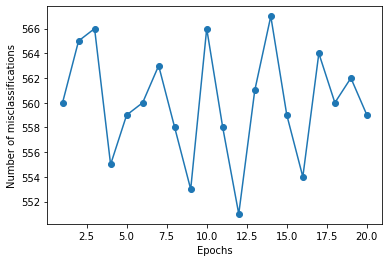

In [40]:
import matplotlib.pyplot as plt
pn = Perceptron(0.1, 20)
pn.fit(X, y)
plt.plot(range(1, len(pn.errors) + 1), pn.errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

## Stretch Goals:

- Research "backpropagation" to learn how weights get updated in neural networks (tomorrow's lecture). 
- Implement a multi-layer perceptron. (for non-linearly separable classes)
- Try and implement your own backpropagation algorithm.
- What are the pros and cons of the different activation functions? How should you decide between them for the different layers of a neural network?